# 0. はじめに

## 0.1 自己紹介

- 中田 秀基
- 産業技術総合研究所 デジタルアーキテクチャ研究センター
- 専門
    - 並列計算 / 計算機言語
    - 機械学習 / 人工知能

- 翻訳書


| <img src="images/python-book.jpg" width="200"/> | <img src="images/unsupervised.jpg" width="200"/> | <img src="images/pytorch.jpg" width="200">|
| --- | --- | --- |
</p>

## 0.2 本日の構成

1. 機械学習の基礎
    1. 人工知能と機械学習
    2. 機械学習手法の分類
    3. モデルの複雑さと過学習
    4. Scikit-learnとPyTorch

2. さまざまな機械学習のモデル
    1. 教師なし機械学習モデル
        1. PCA
        2. K-means
    2. 教師あり機械学習モデル
        1. K-NN法
        2. 線形モデル
        3. 決定木とそのバリエーション
        4. SVM
        5. ニューラルネットワークの基礎

3. データ表現と特徴量エンジニアリング
    1. カテゴリ変数と連続変数
    2. ワンホットエンコーディング
    3. 交互作用と多項式

4. モデルの評価とパラメータチューニング
    1. 交差検証
    2. グリッドサーチ
    3. 評価基準とスコア

5. ニューラルネットワークによる画像分類への応用
    1. ニューラルネットワークとディープラーニング
    2. PyTorchの紹介
    3. CNNの構造
    4. データオーグメンテーション
    5. 転移学習
    6. CNNによる犬画像と猫画像の分類

6. まとめ（よくある落とし穴）
    1. ニューラルネットワークに関するその他の話題
        1. GAN
        2. 拡散ネットワーク
    2. よくある落とし穴
        1. 機械学習でできることとできないこと
        2. 機械学習でやってはいけないこと



# 1. 機械学習の基礎
## 1.1 人工知能と機械学習
### 人工知能
人工的に知能を模倣しようという試み全般を広く指す
- 最適化
- 記号推論
必ずしも学習を伴わない \
ex. 第5世代 知識を論理で書き下しておいてそれを用いて推論

### 機械学習


## 1.1 機械学習とは


| test | test 2 |
| ---- | --- |
| item | item 2|


In [3]:
import matplotlib.pyplot as plt

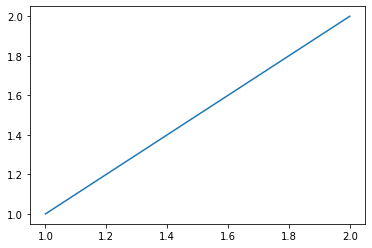

In [4]:
plt.plot([1, 2], [1, 2])